![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np

**Import data**

In [0]:
link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
retail = pd.read_csv(link, encoding='latin1')

In [3]:
# Print out First 5 rows from dataframe
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Print out brief info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [5]:
# Your code here
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [6]:
# List all NaN values
retail[retail.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/10 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/10 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/10 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/10 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/10 14:32,0.43,NaN,United Kingdom


**Exclude negative Quatity entries**

In [0]:
negativeQuantityIndex = retail[retail['Quantity'] < 0].index
retail.drop(negativeQuantityIndex, inplace=True)

In [8]:
retail[retail['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Exclude negative Price entries**

In [0]:
negativePriceIndex = retail[retail['UnitPrice'] < 0].index
retail.drop(negativePriceIndex, inplace=True)

In [10]:
retail[retail['UnitPrice'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [11]:
retail[retail['Country'] == 'United Kingdom']['CustomerID'].value_counts().head(1)

17841.0    7847
Name: CustomerID, dtype: int64

In [12]:
retail[retail['CustomerID'] == 17841].sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
519192,580136,22807,SET OF 6 T-LIGHTS TOADSTOOLS,4,12/1/11 19:42,2.95,17841.0,United Kingdom


**The customer with the highest money spent on purchases comes from Netherlands**

In [13]:
retail[retail['Country'] == 'Netherlands'].sort_values(by='UnitPrice', ascending=False).head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
338448,566557,22823,CHEST NATURAL WOOD 20 DRAWERS,2,9/13/11 11:47,110.0,14646.0,Netherlands


**On which year had the highest sales?**

In [0]:
def pre_processing_datetime(time):
  date = time.split()
  temp = date[0].split('/')
  if len(temp[0]) < 2:
    temp[0] = '0' + temp[0]
  if len(temp[1]) < 2:
    temp[1] = '0' + temp[1]
  temp[2] = '20' + temp[2]
  date[0] = '/'.join(temp)
  date = ' '.join(date)
  return date

In [0]:
retail['InvoiceDate'] = retail['InvoiceDate'].apply(pre_processing_datetime)

In [16]:
retail.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24232,538346,21907,I'M ON HOLIDAY METAL SIGN,12,12/10/2010 14:53,2.10,17865.0,United Kingdom
411199,572196,85152,HAND OVER THE CHOCOLATE SIGN,384,10/21/2011 11:54,1.49,18102.0,United Kingdom
71100,542109,20677,PINK POLKADOT BOWL,6,01/25/2011 13:44,1.63,NaN,United Kingdom
292295,562549,22630,DOLLY GIRL LUNCH BOX,3,08/05/2011 16:10,1.95,17092.0,United Kingdom
57250,541138,22556,PLASTERS IN TIN CIRCUS PARADE,12,01/14/2011 10:42,1.65,12553.0,France
54666,540971,22554,PLASTERS IN TIN WOODLAND ANIMALS,12,01/12/2011 14:10,1.65,12383.0,Belgium
306272,563745,23204,CHARLOTTE BAG APPLES DESIGN,20,08/19/2011 9:38,0.85,15159.0,United Kingdom
55002,540977,21329,DINOSAURS WRITING SET,1,01/12/2011 15:01,3.36,NaN,United Kingdom
326061,565471,22457,NATURAL SLATE HEART CHALKBOARD,6,09/05/2011 10:12,2.95,13931.0,United Kingdom
471473,576644,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,11/16/2011 10:01,7.46,NaN,United Kingdom


In [0]:
retail['InvoiceDate'] = retail['InvoiceDate'].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y %H:%M'))

In [0]:
temp1 = retail.copy()
temp1['Year'] = temp1['InvoiceDate'].dt.year

In [19]:
print('UnitPrice in 2010: {}'.format(temp1[temp1['Year'] == 2010].shape[0]))
print('UnitPrice in 2011: {}'.format(temp1[temp1['Year'] == 2011].shape[0]))

UnitPrice in 2010: 41683
UnitPrice in 2011: 489600


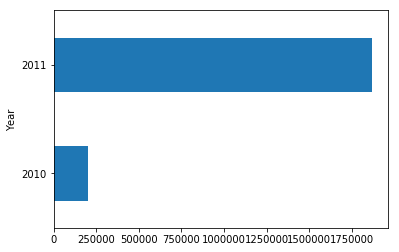

In [20]:
temp1.groupby('Year')['UnitPrice'].sum().plot(kind='barh')

**How many orders (per hour)?**

In [21]:
temp1['Hour'] = temp1['InvoiceDate'].dt.hour
temp1.groupby('Hour')['UnitPrice'].sum()

Hour
6          4.250
7       1528.270
8      29439.850
9     147681.941
10    197139.281
11    207252.680
12    246700.910
13    244457.690
14    261685.071
15    338327.560
16    231843.940
17    117780.861
18     34014.150
19     11698.440
20      1892.880
Name: UnitPrice, dtype: float64

**Make a plot about number of orders per hour**

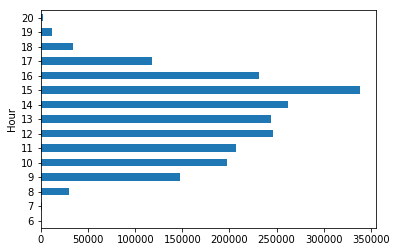

In [22]:
temp1.groupby('Hour')['UnitPrice'].sum().plot(kind='barh')

**How many orders (per month)?**

In [23]:
temp1['Month'] = temp1['InvoiceDate'].dt.month
temp1.groupby('Month')['UnitPrice'].sum()

Month
1     129735.010
2     108169.960
3     145628.240
4     115603.731
5     150417.050
6     140240.390
7     143008.521
8     138453.980
9     174774.462
10    223426.870
11    300525.350
12    301464.210
Name: UnitPrice, dtype: float64

**Make a plot about number of orders per month**

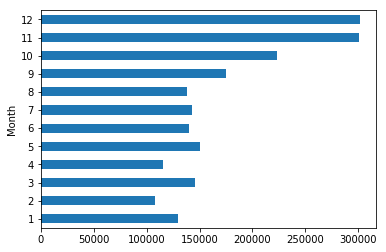

In [24]:
temp1.groupby('Month')['UnitPrice'].sum().plot(kind='barh')

**Top 10 items most sales**

In [25]:
retail.groupby('Description')['Description'].count().sort_values(ascending=False).head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

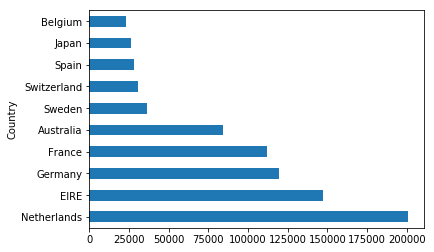

In [26]:
# Your code here
retail[retail['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
# What can you tell about this?

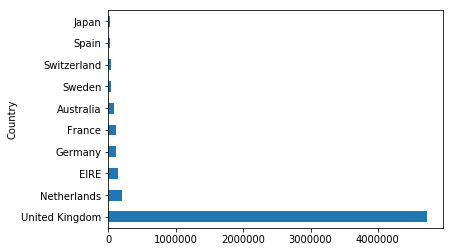

In [27]:
retail.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

Ngoại trừ United Kingdom (UK), Netherlands (Hà Lan) đặt hàng với số lượng nhiều nhất. Nếu so với UK, các quốc gia còn lại sử dụng số lượng rất chênh lệch.

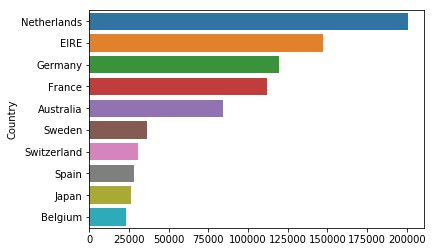

In [28]:
# other way to plot 10 countries with seaborn
result = retail[retail['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=result.values, y=result.index)

### You are awesome!!